# BMI565: Bioinformatics Programming & Scripting

#### (C) 2015 Michael Mooney (mooneymi@ohsu.edu)

## Week 5: Graph Algorithms

1. Graph Algorithms
    - Stacks and Queues
    - Depth-first search
    - Breadth-first search
    - Best-first search
2. Algorithm Analysis
    - Big O notation
    - Examples

#### Requirements

- Python 2.7
- `networkx` module
- `matplotlib` module

In [1]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

## Graph Algorithms

### Stacks and Queues

In [2]:
## Create a stack using a list
stack1 = []

## Add to the stack
stack1.append('A')

## Remove from the stack
stack1.pop()

'A'

In [3]:
## Create a queue using a list
queue1 = []

## Add to the queue
queue1.append('A')
queue1.append('B')

## Remove from the queue
queue1.pop(0)

'A'

** Note: Queues implemented in this way will not be efficent for very large lists, since the elements have to be shifted everytime an element is removed from the beginning of the queue. Use the data structures available in the `collections` module for more optimized queues. 

[https://docs.python.org/2/library/collections.html](https://docs.python.org/2/library/collections.html)

### Depth-first Search

Depth-first search is a graph traversal algorithm that traverses a graph by traveling the entire depth of each branch before backtracking and moving to the next branch.

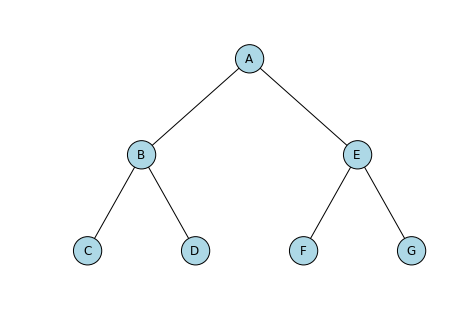

In [4]:
G2 = nx.Graph()
G2.add_edges_from([('A','B'),('B','C'),('B','D'),('A','E'),('E','F'),('E','G')])
pos = {'A':(3,2), 'B':(1,1), 'C':(0,0), 'D':(2,0), 'E':(5,1), 'F':(4,0), 'G':(6,0)}
nx.draw(G2, pos, node_color="lightblue", node_size=800, with_labels=True, arrows=False)

### Breadth-first Search

Breadth-first search, as opposed to depth-first search, first visits all nodes on a particular level before moving down the branch.

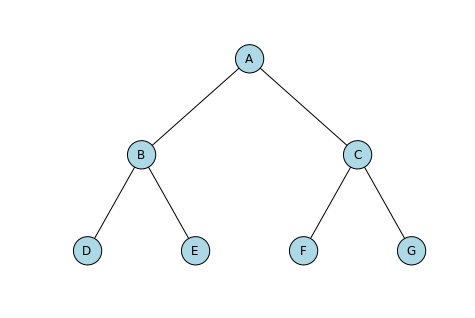

In [5]:
G2 = nx.Graph()
G2.add_edges_from([('A','B'),('A','C'),('B','D'),('B','E'),('C','F'),('C','G')])
pos = {'A':(3,2), 'B':(1,1), 'D':(0,0), 'E':(2,0), 'C':(5,1), 'F':(4,0), 'G':(6,0)}
nx.draw(G2, pos, node_color="lightblue", node_size=800, with_labels=True, arrows=False)

### Best-first Search

Best-first search is a graph traversal algorith that uses a heuristic to decide with nodes to visit as it steps through the graph. In the example below, a 'distance' attribute has been attached to each node representing the distance from the root node. This distance will be used as the heuristic for the search.

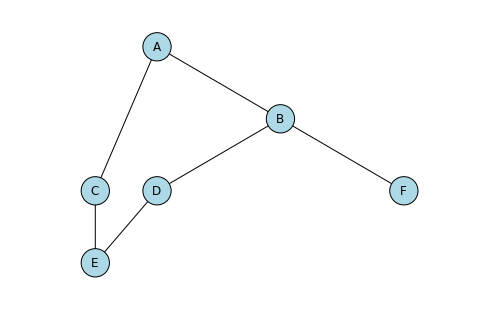

In [6]:
G3 = nx.Graph()
G3.add_edges_from([('A','C'),('A','B'),('B','D'),('B','F'),('D','E'),('C','E')])
G3.node['A']['distance'] = 0
G3.node['B']['distance'] = 3
G3.node['C']['distance'] = 4
G3.node['D']['distance'] = 4
G3.node['E']['distance'] = 5
G3.node['F']['distance'] = 6
pos = {'A':(3,3), 'B':(4,2), 'C':(2.5,1), 'D':(3,1), 'E':(2.5,0), 'F':(5,1)}
nx.draw(G3, pos, node_color="lightblue", node_size=800, with_labels=True)

What would the search path from A to E be?

## Algorithm Analysis

Time complexity and space complexity are two measures used to describe the efficiency of an algorithm. Time complexity estimates the average amount of time an algorithm will need to run, and is usually described by the number of elementary operations (e.g., comparisions, or file reads, etc.) the algorithm will perform. Space complexity estimates the amount of memory an algorithm will need to run. We'll focus on time-complexity here.

### Big O Notation

An algorithm's time complexity is often expressed using big O notation, which is used to simplify the limiting behavior of a function. In this case, the function describes the time complexity of an algorithm given some input. Here are some general rules:

    - If the function f(x) is the sum of multiple terms, only the one with the largest growth rate is kept
    - Constants and coefficients that do not depend on x are omitted
    
For example, the function `f(x) = 6x^4 + 3x^2 + 5` would be reduced to:  O(x^4).


[http://en.wikipedia.org/wiki/Computational_complexity_theory](http://en.wikipedia.org/wiki/Computational_complexity_theory)

[http://en.wikipedia.org/wiki/Big_O_notation](http://en.wikipedia.org/wiki/Big_O_notation)

### Examples

#### Bubble sort

Bubble sort is a sorting algorithm that works by repeatedly iterating through a list and swapping adjacent elements. It stops when it is able to iterate through the entire list without making any swaps.

    ## The list to be sorted
    [4,1,3,5]
    
    ## Iteration 1.
    [4,1,3,5] ## compare 4 and 1, swap: [1,4,3,5]
    [1,4,3,5] ## compare 4 and 3, swap: [1,3,4,5]
    [1,3,4,5] ## compare 4 and 5, no swap [1,3,4,5]
    
    ## Iteration 2.
    [1,3,4,5] ## no swaps necessary

In the worse-case scenario (a reverse sorted list) the algorithm would have to make `(n-1)+(n-2)+(n-3)+...+(n-(n-1))` swaps. This reduces to `n(n-1)/2`, so the big O notation would be O(n^2). The algorithm will not be efficient for very large lists.

#### Binary search

The binary search algorithm searches a sorted list by repeatedly split the list in half and search the appropriate sublist.

    ## The list to be searched
    [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
    
    ## Search for 13
    ## Step 1.
    [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15] ## Find the middle element and compare to target, 13 > 8
    
    ## Step 2.
    [9,10,11,12,13,14,15] ## Find the middle element of sublist and compare to target, 13 > 12
    
    ## Step 3.
    [13,14,15] ## Find middle element of sublist and compare to target, 13 < 14
    
    ## Step 4.
    [13] ## Find middle element of sublist and compare to target, 13 == 13. Target found!


Since the list is being cut in half at each step, the maximum number of comparisons made by the binary search algorithm will be `log(n)+1`. So, the big O notation would be O(log(n)).

## In-Class Exercises

In [1]:
## Exercise 1.
## Implement the bubble sort algorithm.
## Sort the following list [8,7,3,1,2,6]
##
def bubble(L):
    N = len(L)
    swap = True
    while swap:
        swap = False
        for i in range(N-1):
            if L[i] > L[i+1]:
                L[i], L[i+1] = L[i+1], L[i]
                swap = True
    return L

bubble([8,7,3,1,2,6])    

[1, 2, 3, 6, 7, 8]

In [ ]:
## Exercise 2.
## Implement the binary search algorithm
## Search the following list [1,3,6,18,32,45,99,101,102,251,322]
##
def binary(L, target, start=0, stop=len(L)-1):
    

## References
- [http://networkx.github.io/documentation/latest/index.html](http://networkx.github.io/documentation/latest/index.html)

#### Last Updated: 20-Oct-2015